In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Tarea ejercicios libro

Esta tarea consiste en realizar los ejercicios 1.2, 1.3, 1.10, 1.11, 1.12 del libro Learning from data: a short course.

## Ejercicio 1.2

Suponga que usamos un perceptron para detectar mensajes de spam. Podemos decir que cada correo es está representado por la frecuencia de ocurrencia de palabras clave, y la salida de el mensaje es +1 si el mensaje es considerado spam.

- (a) Puedes pensar algunas palabras que tendrán con un peso grande en el perceptron?

**Solución:** En este caso algunas de las palabras que pueden dar un peso positivo en el perceptrón (que aparezcan en mensajes spam) son: Gratis!, Obten, Gana, Barato.

- (b) ¿Que palabras tendrán un peso negativo?

**Solución:** En este caso algunas de las palabras que dan un peso negativo en el perceptrón (no aparecen en mensajes spam) son: Cordial saludo, Tarea, Prácticas.

- (c) ¿Que parámetro en el perceptron afectará directamente afecta cuantos mensajes frontera terminaran siendo clasificados como spam? 

**Solución:** El parámetro dado por $b$ en el perceptron afecta directamente a la cantidad de mensajes límite que terminan clasificándose como spam. Esto es porque $b$ es el umbral utilizado para clasificar los correos electrónicos en categorías de spam y no spam.

## Ejercicio 1.3

La regla de actualización de peso en (1.3) tiene una buena interpretación de lo que se mueve correctamente en dirección de clasificar $x(t)$ :

<img src="Ej13.png"
     alt="Ej"
     style="float: left; margin-right: 100%; width:250px; text-align:center; margin-left: 30%"/>
     
<br></br>    
<br></br>

- (a) Muestre que $y(t)w^T(t)x(t) < 0$ [Hint: $x(t)$ es mal clasificado por $w(t)$].

**Solución:** Si $x(t)$ es mal clasificado por $w(t)$, entonces $w^T(t)x(t)$ tiene diferentes signos a $y(t)$ por lo tanto, $y(t)w^T(t)x(t) < 0$.

- (b) Muestre que $y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)$ [Hint: Usar (1.3)].

**Solución:** Tenemos que

$$\begin{align}
    y(t)w^T(t+1)x(t) &= y(t)(w(t) + y(t)x(t))^T x(t)\\
    &= y(t) (w^T(t) + y(t)x^T(t))x(t)\\
    &= y(t)w^T(t)x(t) + y(t)y^T(t)x^T(t)x(t)\\
    &> y(t)w^T(t)x(t) \quad \text{Por lo que $y(t)y^T(t)x^T(t)x(t) > 0$}
\end{align}$$

- (c) En lo que respecta a la clasificación de $x(t)$, argumente que el movimiento desde $w(t)$ a $w(t+1 )$ es un movimiento 'en la dirección correcta'.

**Solución:** Es claro que del subproblema anterior (b) tenemos que $y(t)w^T(t)x(t)$ incrementa con cada aumento en $t$. Si $y(t)$ es positivo, pero $w^T(t)x(t)$ es negativo, entonces movemos $w^T(x)x(t)$ hacia el componente positivo incrementándolo. Sin embargo, si $y(t)$ es negativo, pero $w^T(t)x(t)$, entonces $y(t)w^T(t)x(t)$ esta incrementando, lo que significa que $w^T(t)x(t)$, esta decrementando.

Entonces el "movimiento" entre $w(t)$ a $w(t+1)$ es un movimiento en la dirección correcta en cuanto a clasificar $x(t)$. 

## Ejercicio 1.10

Este es un experimento que ilustra la diferencia entre un solo contenedor y múltiples contenedores. Realiza una simulación por computadora lanzando 1,000 monedas. Lanza cada moneda de forma independiente 10 veces. Enfoquémonos en 3 monedas de la siguiente manera: $c_{1}$ es la primera moneda lanzada; $c_{\text {rand }}$ es una moneda que eliges al azar; $c_{\min }$ es la moneda que tuvo la frecuencia mínima de caras (elige la más temprana en caso de empate). Sean $\nu_{1}, \nu_{\text {rand }}$ y $\nu_{\min }$ las fracciones de caras obtenidas para las respectivas tres monedas.

(a) ¿Cuál es el valor esperado $\mu$ para las tres monedas seleccionadas?

**Solución:** En este caso como las monedas no son trucadas, entonces $\mu = 0.5$ para las 3 monedas ya que su distribución de probabilidad es uniforme.

(b) Repite este experimento completo un gran número de veces (por ejemplo, 100,000 ejecuciones del experimento completo) para obtener varias instancias de $\nu_{1}, \nu_{\text {rand }}$ y $\nu_{\min }$, y traza los histogramas de las distribuciones de $\nu_{1}, \nu_{\text {rand }}$ y $\nu_{\min }$. Observa que las monedas que resulten ser $c_{\text {rand }}$ y $c_{\min }$ pueden variar de una ejecución a otra.

**Solución:**

In [2]:
def exp(x,flips,n):
  #Ejecuta el experimento de las monedas una vez
  exp=np.zeros((flips,n))
  
  for i in range(flips):
    #Lanzamiento de las monedas
    exp[i]=np.random.randint(low=0,high=2,size=n)

  all=np.mean(exp,axis=0) #Fracción de caras

  v1=all[1]
  vrand=np.random.choice(all)
  vmin=np.min(all)

  return v1,vrand,vmin

n=1000
flips=10
N=100000

#Se ejecuta el experimento muchas veces
data1=np.vectorize(exp)(np.zeros(N),flips,n)

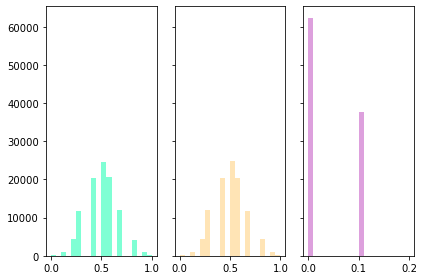

In [3]:
#plt.rcParams.update({"text.usetex": True}) #

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 20
# Crear el histograma para data1
axs[0].hist(data1[0],bins=n_bins, color='aquamarine')
axs[1].hist(data1[1],bins=n_bins, color='moccasin')
axs[2].hist(data1[2],bins=n_bins, color='plum')

# Agregar leyenda

#axs[0].legend(loc='upper left')

# Mostrar el gráfico
plt.show()

(c) Utilizando $b)$, traza las estimaciones para $\mathbb{P}[|\nu-\mu|>\epsilon]$ en función de $\epsilon$, junto con la cota de Hoeffding $2 e^{-2 \epsilon^{2} N}$ (en el mismo gráfico).

**Solución:**

In [4]:
mu=0.5
dif= lambda x: np.abs(x-mu)
difs =np.vectorize(dif)(data1) #Calculo de la distancia entre nu y mu

eps=np.arange(0,0.5,0.001)
hoeff= 2.0*np.exp(-2.0*flips*(eps**2)) #Calculo de la cota

prob= lambda x,indx: np.sum(difs[indx]>x)/N

#Probabilidades de cada moneda
p1=np.vectorize(prob)(eps,0)
prand=np.vectorize(prob)(eps,1)
pmin=np.vectorize(prob)(eps,2)

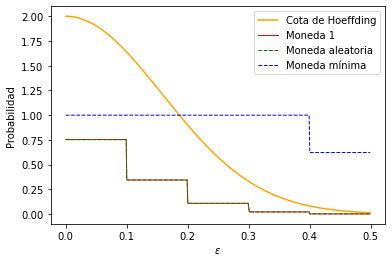

In [5]:
fig, ax = plt.subplots()
 
#Gráfico de las probabilidades
plt.plot(eps, hoeff, color='orange', label='Cota de Hoeffding')
plt.plot(eps, p1, color='r', linewidth=1, label='Moneda 1')
plt.plot(eps, prand, color='g', linewidth=1, linestyle='dashed', label='Moneda aleatoria')
plt.plot(eps, pmin, color='b', linewidth=1, linestyle='dashed', label='Moneda mínima')
plt.xlabel(r'$\epsilon$')
plt.ylabel('Probabilidad ')
plt.legend()
plt.show()

(d) ¿Que monedas cumplen con la cota de Hoeffding y cuáles no? Explica por qué.

**Solución:** La primera moneda y las monedas aleatorias cumplen la cota de Hoeffding. La moneda con frecuencia mínima de caras no cumple la cota de Hoeffding. Esto es porque las 2 primeras monedas fueron escogidas antes del experimento, mientras que la última fue escogida luego del experimento, esto viola la condición de la desigualdad de Hoeffding la cual dice que la hipótesis h fue arreglada antes de que las muestras fueron escogidas.

(e) Relaciona la parte (d) con los múltiples recipientes en la Figura 1.10.

<img src="fig110.png"
     alt="Ej"
     style="float: left; margin-right: 100%; width:500px; text-align:center; margin-left: 20%"/>
  
<br> 

**Solución:** La figura 1.10 muestra como elegir un contenedor para cada hipótesis, en el experimento de las monedas podemos elegir que moneda escoger antes de hacer el experimento, de esta manera nos aseguramos de que el experimento si pueda ser tratado como una variable aleatoria.

## Ejercicio 1.11

Se nos proporciona un conjunto de datos $\mathcal{D}$ con 25 ejemplos de entrenamiento de una función objetivo desconocida $f: \mathcal{X} \rightarrow \mathcal{Y}$, donde $\mathcal{X}=\mathbb{R}$ y $\mathcal{Y}=\{-1,+1\}$. Para aprender $f$, utilizamos un conjunto de hipótesis simple $\mathcal{H}=\left\{h_{1}, h_{2}\right\}$ donde $h_{1}$ es la función constante +1 y $h_{2}$ es la función constante -1.

Consideramos dos algoritmos de aprendizaje, S (inteligente) y C (loco). S elige la hipótesis que concuerda más con $\mathcal{D}$ y C elige deliberadamente la otra hipótesis. Veamos cómo se desempeñan estos algoritmos fuera de la muestra desde los puntos de vista determinista y probabilístico. Supongamos, en el punto de vista probabilístico, que hay una distribución de probabilidad en $\mathcal{X}$, y sea $\mathbb{P}[f(\mathbf{x})=+1]=p$.


(a) ¿Puede S producir una hipótesis que garantice un mejor rendimiento que el azar en cualquier punto fuera de $\mathcal{D}$?

**Solución:** $S$ no puede producir una hipótesis que es garantizada de funcionar mejor que un punto cualquiera fuera de D.

Si $f$ tiene $25 + 1$ en $D$ $-1$ en todos los otros puntos de $X$, S va a escoger la hipótesis $h_1$, la cual no coincidirá con $f$ fuera de $D$. Por otro lado una función aleatoria va a tener $+1$ y $-1$ (la cual será 50/50), y va a coincidir con $f$ la mitad del tiempo lo cual será mejor que la función producida por $S$.

(b)  Supongamos, para el resto del ejercicio, que todos los ejemplos en $\mathcal{D}$ tienen $y_{n}=+1$. ¿Es posible que la hipótesis que produce C resulte ser mejor que la hipótesis que produce S?

**Solución:** Es posible que $C$ produce una mejor hipótesis que $S$ produce, podemos tomar otra vez la función del ejemplo anterior.

(c) Si $p=0.9$, ¿cuál es la probabilidad de que S produzca una hipótesis mejor que C?

**Solución:** Si en cada punto en $D$ tiene $1$, entonces $S$ va a escoger $h_1$ y $C$ va a escoger $h_2$. Entonces afuera de $D$, $h_1$ tendrá un $90%$ de coincidir con $f$, mientras $h_2$ solo tendrá un $10%$. $S$ siempre producirá una mejor hipótesis que $C$.

(d) ¿Existe algún valor de $p$ para el cual sea más probable que no que C produzca una hipótesis mejor que S?

**Solución:** Del problema anterior, tenemos que cuando $p < 0.5$, $C$ va a producir una mejor hipótesis que $S$. Cuando $C$ siempre produce $h_2$, la cual va a coindidir con $f$ mejor que $h_1$ si $p < 0.5$.

## Ejercicio 1.12

Una amiga se acerca a ti con un problema de aprendizaje. Dice que la función objetivo $f$ es completamente desconocida, pero tiene 4,000 puntos de datos. Está dispuesta a pagarte para resolver su problema y producirle un $g$ que aproxime a $f$. ¿Qué es lo mejor que puedes prometerle de las siguientes opciones?
<ul>
    <li> (a) Después de aprender, le proporcionarás un $g$ que garantizará una buena aproximación de $f$ fuera de la muestra. </li>
    <li> (b) Después de aprender, le proporcionarás un $g$, y con alta probabilidad el $g$ que produzcas aproximará bien a $f$ fuera de la muestra.</li>
    <li> (c) Ocurrirá una de las dos cosas. </li>
        <ul>
            <li> (i) Producirás una hipótesis $g$; </li>
            <li> (ii) Declararás que fracasaste. </li>   
        </ul> 
        Si devuelves una hipótesis $g$, entonces con alta probabilidad el $g$ que produzcas aproximará bien a $f$ fuera de la muestra.
</ul>


**Solución:**

La mejor respuesta que podemos prometer es la opción (c), ya que no tenemos mucha información acerca de la función objetivo $f$ la cual puede tener una complejidad muy alta y es posible que no podamos aprender. En caso de que si se pueda la probabilidad de que $g$ coincida con $f$ es alta respecto a la desigualdad de Hoeffding, y el error en $g$ puede ser pequeño ya que tenemos un dataset relativamente grande. 

---

**Navegacion entre los Notebooks:**

Regresar a [Introducción de los ejercicios del libro](Introducción_Tarea_Libro.ipynb)<br>

---

**Autores:** Alejandro Martin Salcedo.
